# Managing offline map areas

![](https://developers.arcgis.com/features/offline/offline-maps.jpg)

With ArcGIS you can take your web maps and layers offline in field apps to continue work in places with limited or no connectivity. Using [ArcGIS Runtime SDKs](https://developers.arcgis.com/features/offline/), you can build offline ready apps that can make use of this functionality. A GIS administrator or content manager/owner can prepare map areas ahead of time to make going offline faster and easier for the field worker. This guide describes how to use the ArcGIS API for Python to create **preplanned offline map areas** for use in the ArcGIS Runtime SDKs and in the future, with apps like Collector.

To learn about the general concept and steps in taking a map offline, refer [here](https://developers.arcgis.com/ios/latest/swift/guide/create-an-offline-map.htm). To understand the data requirements needed to take a map offline, refer [here](https://doc.arcgis.com/en/collector/ios/create-maps/offline-map-prep.htm).

## Creating offline map areas

With ArcGIS API for Python, you can conveniently manage offline areas from the `WebMap` object. The [`offline_areas`](https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.mapping.html#arcgis.mapping.WebMap.offline_areas) property off the `WebMap` object gives you access to the [`OfflineAreaManager`](https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.mapping.html#offlinemapareamanager) object with which you can `create()`, `list()` and `update()` these offline packages.

In [1]:
from arcgis.gis import GIS
from arcgis.mapping import WebMap
gis = GIS("https://www.arcgis.com","arcgis_python","P@ssword123")

Let us use a fire first responder web map and take it offline.

<Item title:"WM for OMA min max scales" type:Web Map owner:demo_deldev>
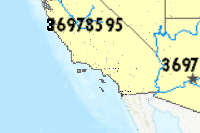

In [2]:
wm_item = gis.content.get('7f88050bf48749c6b9d82634f04b6362')
wm_item

In [3]:
fire_webmap = WebMap(wm_item)

You can create offline areas for a specified extent or a bookmark. You can additionally specify any layers that you need to ignore, a destination folder to store these packages and a min, max scale to which the packages need to be cached.

List the bookmarks in the web map:

In [4]:
for bookmark in fire_webmap.definition.bookmarks:
    print(bookmark.name)

Socal
NorCal


Create offline areas for the bookmark "Southern California" and while we are at it, let us limit the scales for which the packages need to be created. As one of the parameters, you can specify a name, title, description for the "offline map area" item that gets created during this process.

In [6]:
offline_item_properties = {'title': 'Offline area for Southern California',
                          'tags': ['Python', 'automation', 'fires'],
                          'snippet': 'Area created for first responders'}

socal_offline_item = fire_webmap.offline_areas.create(area = fire_webmap.definition.bookmarks[1].name,
                                                     item_properties = offline_item_properties,
                                                     min_scale = 147914000,
                                                     max_scale = 73957000)

This operation can take a while as the server is packaging the contents of the web map for offline use. To view the status, you can optionally turn on the verbosity using the `env` module as shown below:

```python
from arcgis import env
env.verbose = True
```

In [8]:
socal_offline_item

<Item title:"Offline area for Southern California" type:Map Area owner:demo_deldev>

The type of the item we just created is `Map Area`. Read along to see how you can list the packages created for this map area.

In [9]:
socal_offline_item.type

'Map Area'

### Inspecting offline packages created for a map area
The packages created for a `Map Area` item share a relationship of type `Area2Package` with that `Item`. Thus using the `related_items()` method off the `Item` object, you can list those packages as shown below:

In [10]:
socal_offline_item.related_items('Area2Package', 'forward')

[<Item title:"WTL_usa-1b8fefd666444ae199df560e6df50eee" type:Tile Package owner:demo_deldev>,
 <Item title:"World_Topo_Map-dbf7e376acec4b70b802d8fa0f3bac93" type:Tile Package owner:demo_deldev>,
 <Item title:"VectorTileServe-29fe800f37f640abbfd342b8ad679a9b" type:Vector Tile Package owner:demo_deldev>]

These items are meant for use in offline applications described above. However, if needed, you can call the `download()` method off these `Item`s and download their data to disk using the Python API.

## Listing offline areas created for a web map
You can use the `list()` method off the `offline_areas` property of a `WebMap` object to find the offline areas created for that web map.

In [11]:
fire_webmap.offline_areas.list()

[<Item title:"Offline area for Southern California" type:Map Area owner:demo_deldev>]

## Updating offline areas
Keeping offline areas up to date is an important task. You can accomplish this by calling the `update()` method off the `offline_areas` property of the `WebMap` object. This method accepts a list of `Map Area` items as input. To update all the offline areas created for a web map call the method without any input parameters.

Below is an example of how the progress is relayed back to you when you turn on the `verbosity` in the `env` module.

In [12]:
# update all offline areas for the fire web map
fire_webmap.offline_areas.update()

Submitted.
Executing...
Start Time: Wednesday, April 11, 2018 11:15:13 PM
Running script RefreshMapAreaPackage...
pending - http://tiles.arcgis.com/tiles/SMX5BErCXLM7eDtY/arcgis/rest/services/WTL_usa/MapServer
pending - https://services.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer
pending - https://tiles.arcgis.com/tiles/SMX5BErCXLM7eDtY/arcgis/rest/services/set1_vtpk_cities/VectorTileServer
pending - http://tiles.arcgis.com/tiles/SMX5BErCXLM7eDtY/arcgis/rest/services/WTL_usa/MapServer
pending - https://services.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer
pending - https://tiles.arcgis.com/tiles/SMX5BErCXLM7eDtY/arcgis/rest/services/set1_vtpk_cities/VectorTileServer
pending - http://tiles.arcgis.com/tiles/SMX5BErCXLM7eDtY/arcgis/rest/services/WTL_usa/MapServer
complete = https://services.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer
pending - https://tiles.arcgis.com/tiles/SMX5BErCXLM7eDtY/arcgis/rest/services/set1_vtpk_cities/Vecto

[{'itemId': '9b49ec838579464f97e85f7613b3aa1c',
  'source': 'https://services.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer',
  'state': 'updated'},
 {'itemId': 'c7549a1973cb487bac4d3f4099bf2940',
  'source': 'https://tiles.arcgis.com/tiles/SMX5BErCXLM7eDtY/arcgis/rest/services/set1_vtpk_cities/VectorTileServer',
  'state': 'updated'},
 {'itemId': '46619dfde09c4eb09bb4b4c99fea8805',
  'source': 'http://tiles.arcgis.com/tiles/SMX5BErCXLM7eDtY/arcgis/rest/services/WTL_usa/MapServer',
  'state': 'updated'}]

Now your field users are all set with the latest packages for use in a disconnected setting.